# Selling Historic Houses Profitably

In [121]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_theme()
sns.set_color_codes()
sns.set(font_scale=1.5)

In [122]:
from my_functions import *

In [123]:
# import data
df = pd.read_csv("data/King_County_House_prices_dataset.csv", parse_dates=["date", "yr_built", "yr_renovated"])
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  datetime64[ns]
 15  yr_renovated   1775

|    | Column name   | Description   |
|---:|:--------------|:--------------|
|  0 | date          | Date of the sale             |
|  1 | price         | Price of sale |
|  2 | bedrooms      | Number of bedrooms |
|  3 | bathrooms     | Number of bathrooms |
|  4 | sqft_living   | Area of living space |
|  5 | sqft_lot      | Area of plot of land  |
|  6 | floors        | Number of floors within property |
|  7 | waterfront    | On the waterfront [Y/N] |
|  8 | view          | Quality of the view on a scale of 1 to 4 |
|  9 | condition     | Condition on a scale of 1 to 5 |
| 10 | grade         | ? |
| 11 | sqft_above    |  Living area not including basement             |
| 12 | sqft_basement | Living area in basement |
| 13 | yr_built      | Year property was built |
| 14 | yr_renovated  | Year property was last renovated |
| 15 | zipcode       | Zip code |
| 16 | lat           | Latitude |
| 17 | long          | Longitude |
| 18 | sqft_living15 | ? |
| 19 | sqft_lot15    |  ? |

## Clean `yr_renovated` column

In [124]:
df["yr_renovated"] = pd.to_datetime(df["yr_renovated"].replace("0.0", np.NaN), format="%Y.0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  datetime64[ns]
 15  yr_renovated   744 

In [125]:
df["price"].describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

## 5 highest-value zip codes

In [126]:
zips = get_zip_means(df)

In [127]:
def map_zips(zips, title="Zip Codes in King's County", width=1300, height=768, sizecount=False, save_html=True, save_jpg=True):
    """ Maps zip codes with Seaborn, optionally saves output to HTML or JPEG files too

    Args:
        zips (_type_): _description_
        title (str, optional): The title. Defaults to "Zip Codes in King's County".
        sizecount (bool, optional): Whether size is the count (i.e. number of data). Defaults to False.
        save_html (bool, optional): Whether to save to HTML. Defaults to True.
        save_jpg (bool, optional):
    """
    import plotly.express as px
    size = "count" if sizecount else "mean_price"
    zips = zips.copy()
    zips["_prefix"] = " ("
    zips["_suffix"] = ")"
    zips["hover"] = zips.index.astype(str) + zips["_prefix"] + zips["name"] + zips["_suffix"]
    fig = px.scatter_mapbox(
        zips,
        mapbox_style="stamen-terrain",
        lat="latitude",
        lon="longitude",
        color="mean_price",
        title=title,
        hover_name="hover",
        width=width,
        height=height,
        size=size,
        zoom=8.5
        )
    fig.show()
    if save_html or save_jpg:
        file_name = title.replace(" ", "_")
        file_name = ''.join(e for e in file_name if (e.isalnum() or e == "_")).lower()
    if save_html:
        fig.write_html(f"html/{file_name}.html")
    if save_jpg:
        fig.write_image(f"images/{file_name}.jpg", width=width, height=height)
map_zips(zips, title="Zip Codes in King's Country: Average Price", save_html=True)

From the map, we can see the point at which things get expensive (purple) is around 850k. This is well above the 75th %ile for the mean price on zip codes.

In [128]:
print(f"The 75th percentile is: {int(round(zips['mean_price'].quantile(0.75), -3))}")

The 75th percentile is: 646000


In [129]:
# Let's get the top 5
top_5_zips = zips.sort_values("mean_price", ascending=False).iloc[0:5]
top_5_zips.drop(columns=["latitude", "longitude"])

,mean_price,count,name
zipcode,,,
98039,2161000,50,Medina
98004,1357000,317,Bellevue
98040,1195000,282,Mercer Island
98112,1096000,269,Seattle
98102,900000,104,Seattle


In [130]:
map_zips(top_5_zips, title="Top 5 most expensive zip codes")

Do the same for historical buildings (i.e. earlier than 1945)

In [131]:
historic_year = pd.to_datetime("1945-12-31", yearfirst=True)
mask_historic = df["yr_built"] < historic_year
historical_zips = get_zip_means(df[mask_historic])
map_zips(historical_zips, title="Zip Codes by Average Price, Historical Only")

Here we can clearly see the range of prices in various zip codes.
* The cheapest neighbourhoods start at $0.2M
* The priciest range up to almost $2M
* 

In [132]:
top_historical_zips = historical_zips.sort_values("mean_price", ascending=False).iloc[0:5]
top_historical_zips.drop(columns=["latitude", "longitude"])

,mean_price,count,name
zipcode,,,
98004,1918000,12,Bellevue
98008,1700000,1,Bellevue
98040,1493000,9,Mercer Island
98039,1440000,4,Medina
98112,1124000,168,Seattle


In [133]:
map_zips(top_historical_zips, "Top 5 historical zip codes by price")

Are these different from the overall most expensive zip codes? They have four in common - only two are in one but not the other.

In [134]:
set(top_historical_zips.index).symmetric_difference(top_5_zips.index)

{98008, 98102}

In [135]:
top_historical_zips_min_count = historical_zips[historical_zips["count"] >= 10].sort_values("mean_price", ascending=False).iloc[0:5]
map_zips(top_historical_zips_min_count, "Top 5 historical zip codes, n > 10", sizecount=True)

Does this give us different results than without the n > 10 criterion?

In [136]:
set(top_historical_zips_min_count.index).intersection(set(top_historical_zips.index))

{98004, 98112}

Again, there are two that are in one but not the other.

## Should I sell now, or wait until autumn?

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Price')]

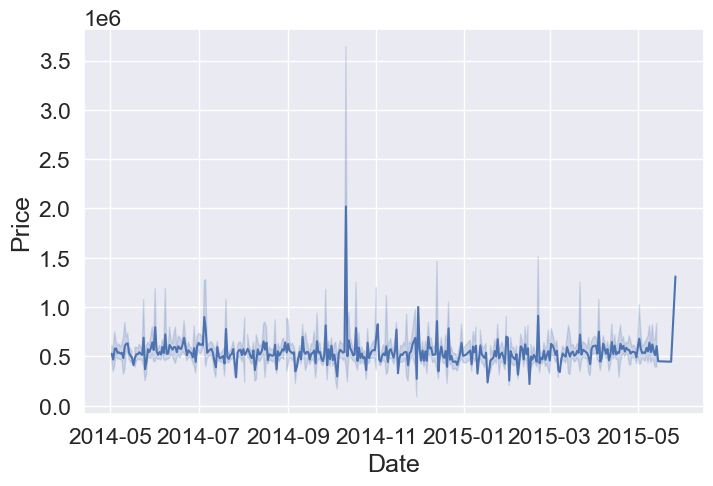

In [137]:
fig = sns.lineplot(df[["price","date"]], x="date", y="price")
fig.set(xlabel="Date", ylabel="Price")

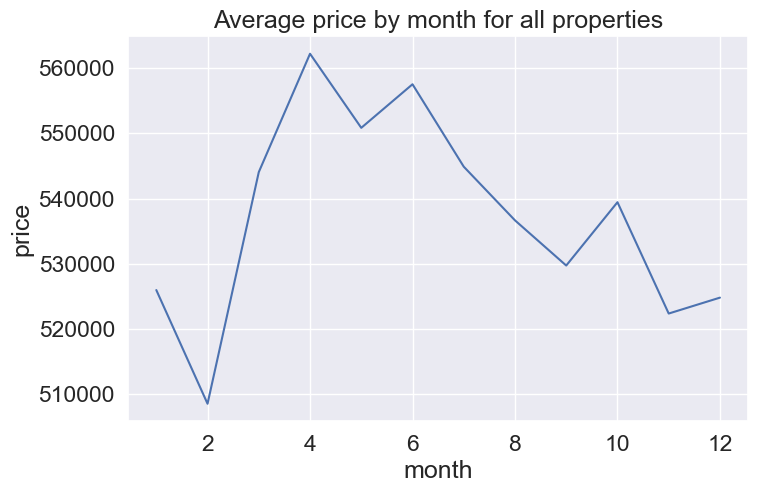

In [138]:
def plot_monthly_prices(df, title=None):
    df = df.copy()
    df["month"] = df["date"].dt.month.astype(int)
    df_month_prices = df[["month", "price"]].groupby("month").mean()
    p = sns.lineplot(df_month_prices, x="month", y="price")
    if title is not None: p.set_title(title)

plot_monthly_prices(df, title="Average price by month for all properties")

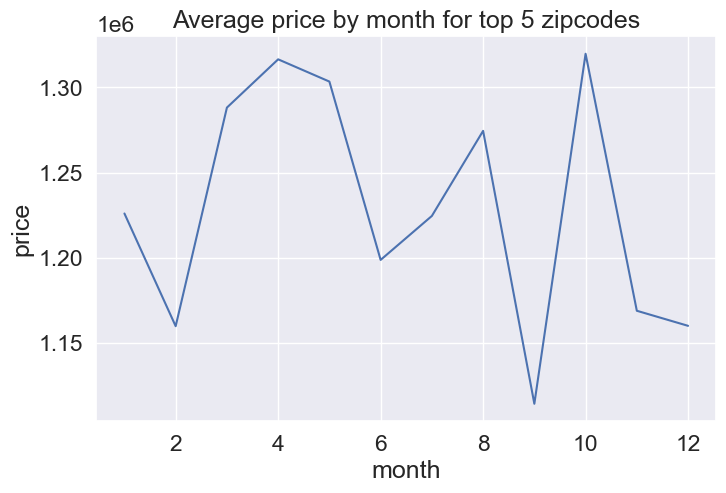

In [139]:
# For top-five zip codes
mask_top_5_zips = df["zipcode"].isin(top_5_zips.index.to_list())
plot_monthly_prices(df[mask_top_5_zips], "Average price by month for top 5 zipcodes")

For the top zip-codes, price-wise it makes little difference whether we sell now or in autumn. There's a larger window of opportunity now though.

If we do renovate, there's a chance to sell in autumn, but if things take longer, the spring window is waiting just after New Year.

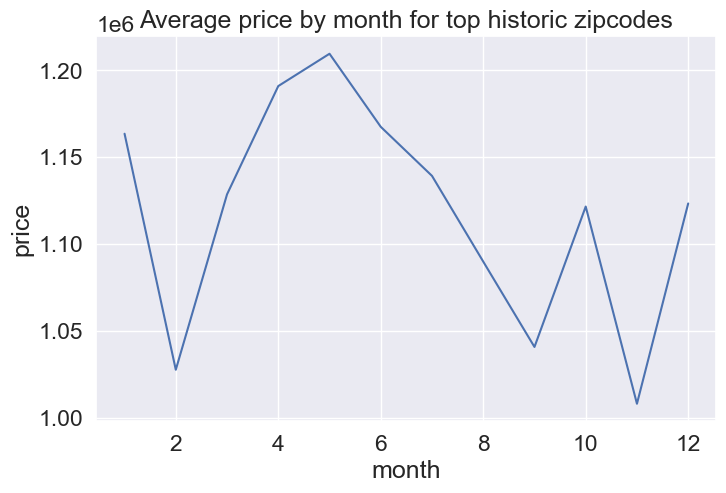

In [140]:
# For top five historic zip codes
mask_top_historical_zips = df["zipcode"].isin(top_historical_zips.index.to_list())
plot_monthly_prices(df[mask_top_historical_zips], title="Average price by month for top historic zipcodes")

For the top historic zipcodes, the picture is slightly different. Autumn is about the worst time to sell!

Is this because of low number of properties in the data?

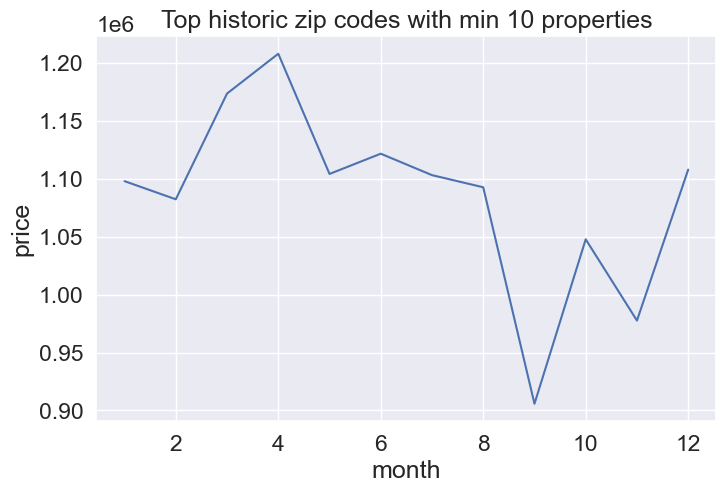

In [141]:
mask_top_historical_zips_min_count = df["zipcode"].isin(top_historical_zips_min_count.index.to_list())
plot_monthly_prices(df[mask_top_historical_zips_min_count], "Top historic zip codes with min 10 properties")

Conclusion: historic properties sold for lowest prices in autumn.

## Should I renovate?

Only a small percentage of the dataset has information on renovation date. So we should be suspicious.

In [142]:
def pc_ren(df, return_value=False):
    if not return_value:
        percent_renovated = df["yr_renovated"].count() / df.index.size * 100
        print(f"{round(percent_renovated, 2)}% of buildings have been renovated.")
    else:
        return percent_renovated

pc_ren(df)

3.44% of buildings have been renovated.


What about historic buildings?

In [143]:
pc_ren(df[mask_historic])

10.23% of buildings have been renovated.


This is surprising... so we should take it with a pinch of salt.

In [144]:
# add a column "really_renovated" – this is either the year renovated, or the year of build if NaN

not_renovated_mask = df["yr_renovated"].notna()
bad_condition_mask = df["condition"] <= 3

df["really_renovated"] = df["yr_renovated"].fillna(df["yr_built"])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,really_renovated
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1180,0.0,1955-01-01,NaT,98178,47.511,-122.257,1340,5650,1955-01-01
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,2170,400.0,1951-01-01,1991-01-01,98125,47.721,-122.319,1690,7639,1991-01-01
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,770,0.0,1933-01-01,NaT,98028,47.738,-122.233,2720,8062,1933-01-01
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1050,910.0,1965-01-01,NaT,98136,47.521,-122.393,1360,5000,1965-01-01
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1680,0.0,1987-01-01,NaT,98074,47.617,-122.045,1800,7503,1987-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,1530,0.0,2009-01-01,NaT,98103,47.699,-122.346,1530,1509,2009-01-01
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,2310,0.0,2014-01-01,NaT,98146,47.511,-122.362,1830,7200,2014-01-01
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,1020,0.0,2009-01-01,NaT,98144,47.594,-122.299,1020,2007,2009-01-01
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,1600,0.0,2004-01-01,NaT,98027,47.535,-122.069,1410,1287,2004-01-01


In [145]:
condition_renovation = df[["condition", "yr_renovated"]].groupby("yr_renovated").mean()
condition_renovation

,condition
yr_renovated,
1934-01-01,5.000
1940-01-01,3.500
1944-01-01,4.000
1945-01-01,3.333
1946-01-01,3.000
...,...
2011-01-01,3.111
2012-01-01,3.000
2013-01-01,3.065


Text(0.5, 1.0, 'Year renovated against condition')

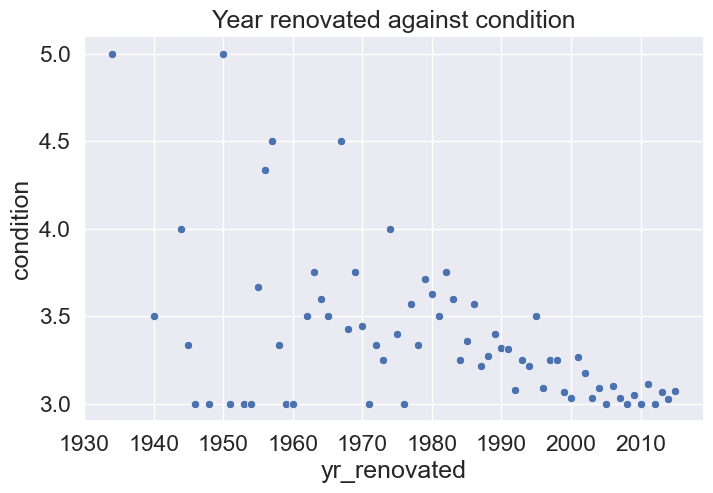

In [146]:
p = sns.scatterplot(condition_renovation, x="yr_renovated", y="condition")
p.set_title("Year renovated against condition")

<AxesSubplot:xlabel='really_renovated'>

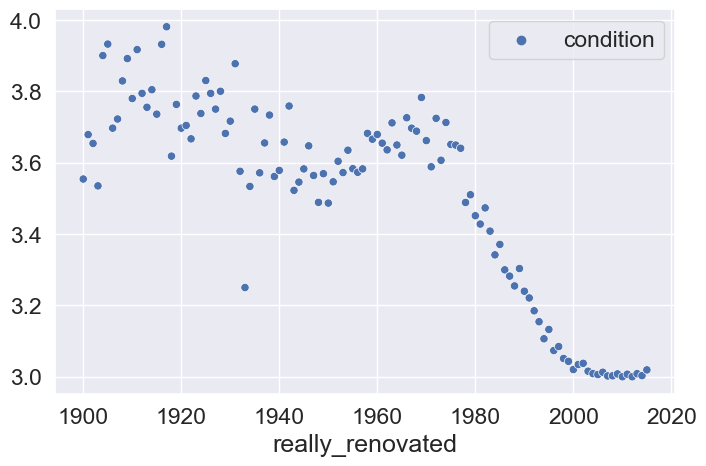

In [147]:
# find average condition by really_renovated year
condition_x_ren_year = df[["really_renovated", "condition"]].groupby("really_renovated").mean()
sns.scatterplot(data=condition_x_ren_year)

Does yr_renovated really add anything? Let's do the same, but for just the build year.

Text(0.5, 1.0, 'Year built against condition')

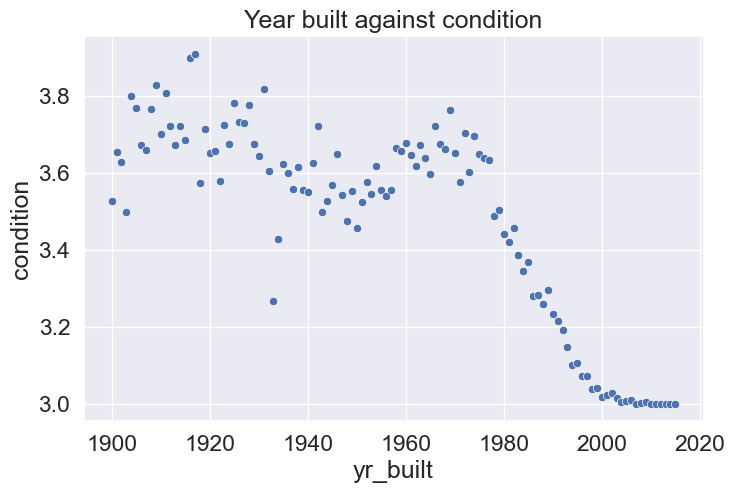

In [148]:
condition_x_build_year = df[["yr_built", "condition"]].groupby("yr_built").mean()
p = sns.scatterplot(data=condition_x_build_year, x="yr_built", y="condition")
p.set_title("Year built against condition")

All the scattergraphs seem to show that the year or renovation/build is actually negatively correlated to condition. We can see that older objects generally are in better condition.

**We can't conclude very much from the data because we would expect condition to correlate with renovation... but the opposite is the case. We can assume that condition is valid, and yr_renovated is not.**

### Is there any correlation between condition and price?

In [149]:
# Separate into price bands, group by average condition, and plot a scatter graph
def mean_condition_x_price_band(df, bins=10, return_pb=False):
    df = df[["price", "condition"]].copy()
    df["price_bands"] = pd.cut(df["price"], bins=bins, labels=range(1, bins+1))
    df_pb_x_c = groupby_mean_and_len(df, use_cols=["price_bands", "condition"], groupby_col="price_bands")
    if return_pb:
        price_bands = groupby_mean_and_len(df, use_cols=["price_bands", "price"], groupby_col="price_bands")
        return (df_pb_x_c, price_bands)
    else:
        return df
condition_x_priceband, price_bands = mean_condition_x_price_band(df, return_pb=True)

<AxesSubplot:xlabel='price_bands', ylabel='mean_condition'>

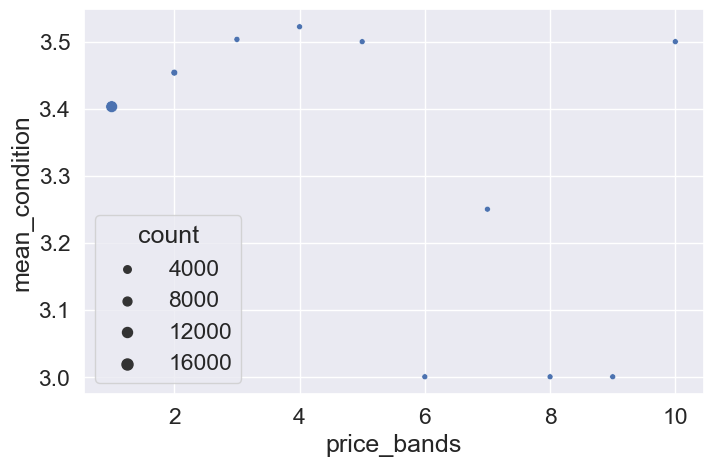

In [150]:
sns.scatterplot(data=condition_x_priceband, x=condition_x_priceband.index, y="mean_condition", size="count")

It looks like there is a correlation between price and condition. Many of the price bands don't have much data. Let's make a cut-off of at least 50 properties.

Text(0.5, 1.0, 'Price bands and their average condition rating, n >= 50')

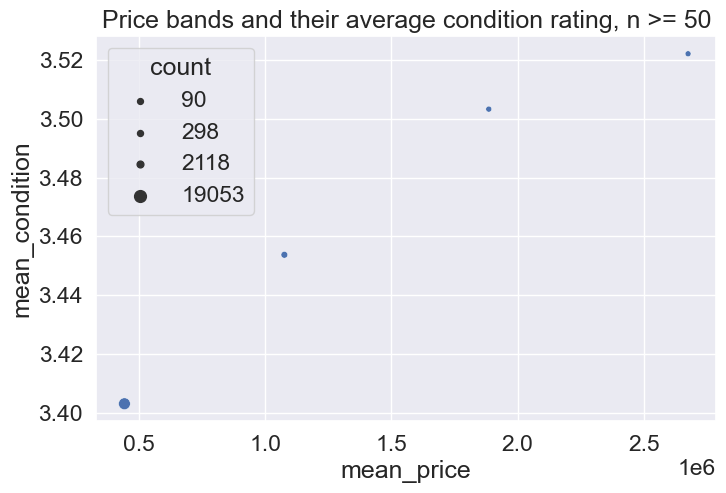

In [151]:
data = condition_x_priceband[condition_x_priceband["count"]>=50].join(price_bands, how="left", rsuffix="_r")
p = sns.scatterplot(data=data, x="mean_price", y="mean_condition", size="count")
p.set_title("Price bands and their average condition rating, n >= 50")

### Correlation between condition and price for historic properties?

<AxesSubplot:xlabel='mean_price', ylabel='mean_condition'>

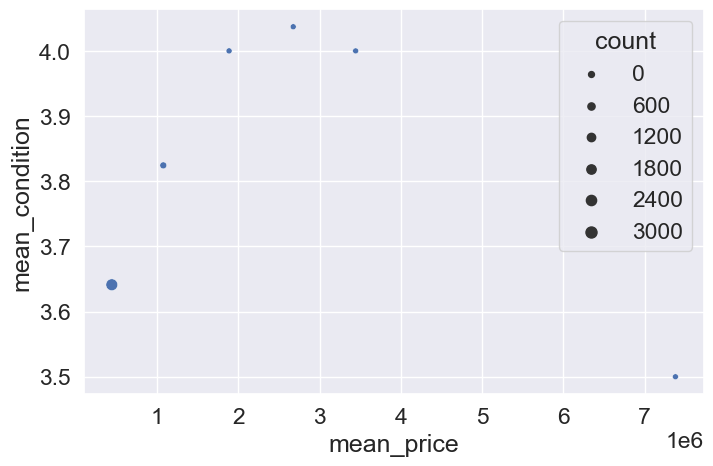

In [152]:
condition_x_priceband_hist, price_bands_hist = mean_condition_x_price_band(df[mask_historic], return_pb=True)
data = condition_x_priceband_hist.join(other=price_bands, how="left", rsuffix="_r")
sns.scatterplot(data=data, x="mean_price", y="mean_condition", size="count")

It seems to be the same story - let's see how much data we have for each price band

In [153]:
price_bands_hist

,mean_price,count
price_bands,,
1,455437.566,3581
2,1066668.423,444
3,1925263.158,57
4,2624814.815,27
5,3391666.667,6
6,NaN,0
7,NaN,0
8,NaN,0
9,NaN,0


We're going to have to be less choosy if we want to see data for the highest price bands and go right down to 5!

Text(0.5, 1.0, 'Price band against mean condition, historic buildings, n >= 5')

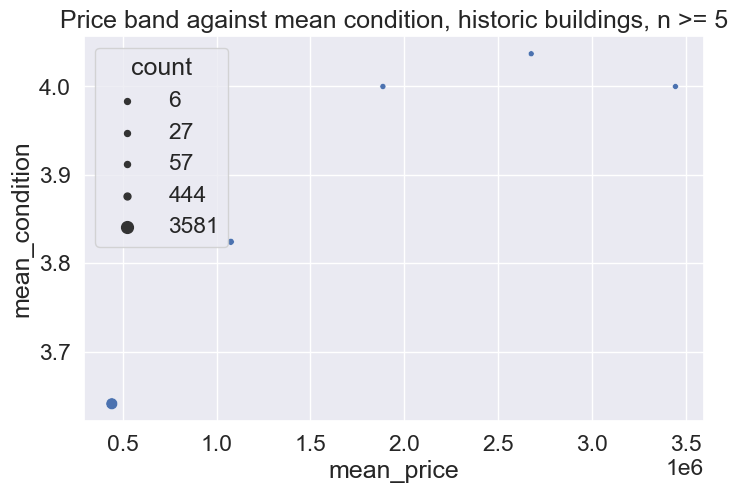

In [154]:
data = condition_x_priceband_hist[condition_x_priceband_hist["count"] >=5].join(other=price_bands, how="left", rsuffix="_r")
p = sns.scatterplot(data=data, x="mean_price", y="mean_condition", size="count")
p.set_title("Price band against mean condition, historic buildings, n >= 5")

### There were no properties that renovated then resold in the timeframe :(

Only 14 renovated then sold within the timeframe.

In [155]:
# Get "duplicates" - i.e. sold at least twice
# find relisted (i.e. duplicate) properties
relisted_mask = df.index.duplicated(keep=False)

# Get those that were renovated in dataset timeframe
renovated_in_timeframe_mask = df["yr_renovated"] >= df["date"].min()

# Get those that weren't renovated in timeframe
not_renovated_in_timeframe_mask = ~renovated_in_timeframe_mask

# Only 14 renovated and sold within the timeframe
df[renovated_in_timeframe_mask]

# Exclude those that were renovated twice - only include those with an ID in both
#ids = pd.merge(left=df[renovated_in_timeframe_mask]["id"], right=df[not_renovated_in_timeframe_mask]["id"], how="inner", on="id")

# Groupby renovation status and average price
# Calculate difference
# Can do this in various segments

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,really_renovated
2293,8712100320,2014-07-28,585000.000,5,2.750,2350,4178,1.500,0.000,0.000,...,1520,830.0,1922-01-01,2015-01-01,98112,47.639,-122.300,1920,4178,2015-01-01
3153,6821100195,2015-03-31,830000.000,4,3.000,2020,6000,1.000,0.000,0.000,...,1220,800.0,1968-01-01,2015-01-01,98199,47.656,-122.401,1400,6000,2015-01-01
4236,6071800100,2015-03-27,815000.000,6,3.000,2860,17853,1.000,0.000,0.000,...,1430,1430.0,1962-01-01,2015-01-01,98006,47.546,-122.175,1920,13452,2015-01-01
5678,2202500255,2015-03-05,335000.000,3,2.000,1210,9926,1.000,0.000,0.000,...,1210,0.0,1954-01-01,2015-01-01,98006,47.573,-122.135,1690,9737,2015-01-01
7090,9141100005,2014-10-28,285000.000,4,3.500,2770,10505,2.000,0.000,0.000,...,2770,0.0,1940-01-01,2015-01-01,98133,47.741,-122.355,1760,10505,2015-01-01
7410,8665900328,2015-01-23,459000.000,4,3.000,1900,9077,2.000,0.000,0.000,...,1900,0.0,1954-01-01,2015-01-01,98155,47.768,-122.304,1900,12868,2015-01-01
8683,8835401250,2015-05-06,1490000.000,6,2.750,4430,6440,2.000,0.000,3.000,...,2680,1750.0,1964-01-01,2015-01-01,98118,47.546,-122.265,3530,7314,2015-01-01
11587,7284900030,2014-05-22,850000.000,4,3.250,3090,6744,2.000,0.000,4.000,...,3090,0.0,1923-01-01,2015-01-01,98177,47.768,-122.388,2020,6656,2015-01-01
11621,461004730,2015-04-06,717000.000,3,1.000,1150,5000,1.000,0.000,0.000,...,1150,0.0,1959-01-01,2015-01-01,98117,47.681,-122.369,1160,5000,2015-01-01
14845,3585900665,2014-06-06,805000.000,5,2.500,4600,19831,1.000,0.000,3.000,...,2300,2300.0,1956-01-01,2015-01-01,98177,47.761,-122.378,2890,19831,2015-01-01


In [156]:
# They went for $0.7m on average - relatively low
np.around(df[renovated_in_timeframe_mask]["price"].mean(), -3) / 1e6

0.697

### Whether to renovate: Conclusion
We can conclude that:
* condition appears to have an impact on price, when you exclude the bands with very little data
* however, the information on condition is relatively limited - it all falls within quite a small range
* the data is thin above band 5, roughly the $2.5 million price tag
* the data is very thin for historical properties. HOWEVER -> a small increase in condition seems to correlate with a large increase in price.

* Now seems to be a good time to sell, and given the uncertainty in the data, and the risk that is associated with renovating (which could take longer than expected and cost more), it makes sense to pick properties for sale that are in a reasonably good condition already (as far above 3 as possible) but not to renovate them.

## Overall conclusion

* The best districts to sell for historical buildings are: ...
* Sell now!
* Don't renovate!